In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [15]:
# Define the adjacency matrix
A = np.array([
    [0, 1, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0]
])

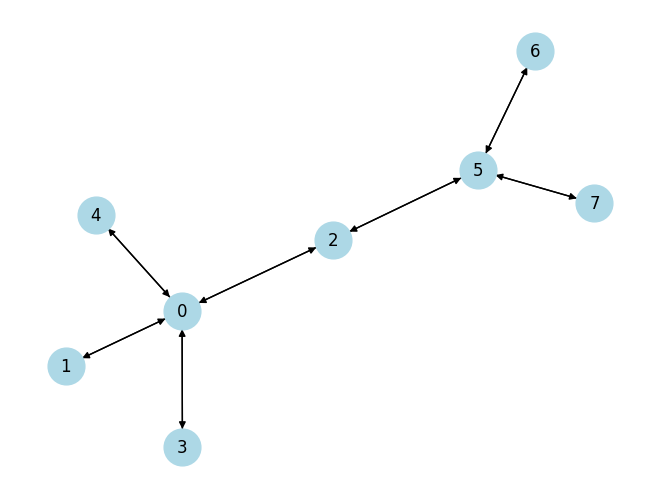

In [16]:
# Create a directed graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.DiGraph())

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", arrows=True)
plt.show()

In [17]:
# Calculate the eigenvectors and eigenvalues of the adjacency matrix
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the index of the largest eigenvalue
index_max = np.argmax(eigenvalues)

# The eigenvector corresponding to the largest eigenvalue is the eigenvector centrality
eigenvector_centrality = eigenvectors[:, index_max]

# Normalize the eigenvector centrality so that the vector has a unit length
eigenvector_centrality = eigenvector_centrality / np.linalg.norm(eigenvector_centrality)

# If the first element is negative, flip the sign of the eigenvector
if eigenvector_centrality[0] < 0:
    eigenvector_centrality = -eigenvector_centrality

# Print the eigenvector centrality for each node
print("Eigenvector centrality for each node:")
print(eigenvector_centrality)

Eigenvector centrality for each node:
[0.60150096 0.27990313 0.45289278 0.27990313 0.27990313 0.37174803
 0.17298965 0.17298965]


In [27]:
# Jaccard Coefficent is a way of measuring the overlap of neighbors between two nodes.
G = nx.Graph(A)

# Calculate Jaccard Coefficients for each pair of nodes
jaccard_coefficients = nx.jaccard_coefficient(G)

# Print Jaccard Coefficients
print("Jaccard Coefficients for each pair of nodes:")
for u, v, jc in jaccard_coefficients:
    print(f"Nodes ({u}, {v}): {jc}")


Jaccard Coefficients for each pair of nodes:
Nodes (0, 5): 0.16666666666666666
Nodes (0, 6): 0.0
Nodes (0, 7): 0.0
Nodes (1, 2): 0.5
Nodes (1, 3): 1.0
Nodes (1, 4): 1.0
Nodes (1, 5): 0.0
Nodes (1, 6): 0.0
Nodes (1, 7): 0.0
Nodes (2, 3): 0.5
Nodes (2, 4): 0.5
Nodes (2, 6): 0.5
Nodes (2, 7): 0.5
Nodes (3, 4): 1.0
Nodes (3, 5): 0.0
Nodes (3, 6): 0.0
Nodes (3, 7): 0.0
Nodes (4, 5): 0.0
Nodes (4, 6): 0.0
Nodes (4, 7): 0.0
Nodes (6, 7): 1.0


In [29]:
# Calculate max value that alpha can be
# This will be later used for the Katz centrality calc
# Calculate all eigenvalues
eigenvalues = np.linalg.eigvals(A)

# Find the largest eigenvalue (in absolute value)
largest_eigenvalue = max(abs(eigenvalues))

# Calculate the reciprocal of the largest eigenvalue
reciprocal_largest_eigenvalue = 1 / largest_eigenvalue

print("The largest eigenvalue:", largest_eigenvalue)
print("Reciprocal of the largest eigenvalue:", reciprocal_largest_eigenvalue)

The largest eigenvalue: 2.148961141749636
Reciprocal of the largest eigenvalue: 0.46534112719498616


In [30]:
# Global neighborhood overlap using Katz centrality
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Choose an alpha value (should be less than 1 / largest eigenvalue of A for convergence)
alpha = 0.3 # alpha should be less than the reciprocal of the largest eigenvalue of the adjacency matrix
beta = 1 

# Compute Katz centrality
katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=beta)

# Print Katz centrality for each node
print("Katz centrality for each node:")
for node, centrality in katz_centrality.items():
    print(f"Node {node}: {centrality}")

Katz centrality for each node:
Node 0: 0.5200190531142507
Node 1: 0.2903561818784677
Node 2: 0.4144935016188395
Node 3: 0.2903561818784677
Node 4: 0.2903561818784677
Node 5: 0.41379126709653613
Node 6: 0.25848788339439527
Node 7: 0.25848788339439527
